In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

In [2]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option("display.max_columns", None)

In [34]:
pd.options.mode.chained_assignment = None 

In [3]:
export_data = pd.read_csv('export.csv')

In [8]:
export_data.head()

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2020-01-01,3.60,1.70,5.00,0.00,0,264.60,17.30,nan,"1,008.20",nan
1,2020-01-02,4.70,0.60,8.90,0.00,0,218.20,12.40,nan,"1,013.90",nan
2,2020-01-03,7.60,6.70,8.30,2.80,0,235.50,8.40,nan,"1,010.20",nan
3,2020-01-04,8.20,6.70,9.40,5.30,0,325.20,5.70,nan,"1,003.70",nan
4,2020-01-05,4.60,2.80,7.20,0.00,0,300.10,8.20,nan,"1,010.10",nan


In [7]:
export_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    31 non-null     datetime64[ns]
 1   tavg    31 non-null     float64       
 2   tmin    31 non-null     float64       
 3   tmax    31 non-null     float64       
 4   prcp    31 non-null     float64       
 5   snow    31 non-null     int64         
 6   wdir    31 non-null     float64       
 7   wspd    31 non-null     float64       
 8   wpgt    0 non-null      float64       
 9   pres    31 non-null     float64       
 10  tsun    0 non-null      float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 2.8 KB


In [6]:
export_data['date'] = pd.to_datetime(export_data['date'])

# , format='%Y/%m/%d %H:%M:%S'

In [9]:
data_yt = pd.read_csv('yellow_tripdata_2020-01.csv')

/Users/akshayshirsat/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
data_yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 879.6+ MB


In [11]:
data_yt.shape

(6405008, 18)

In [12]:
data_yt = data_yt.dropna()

In [13]:
data_yt.shape

(6339567, 18)

In [20]:
data_yt.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.00,2020-01-01 00:28:15,2020-01-01 00:33:03,1.00,1.20,1.00,N,238,239,1.00,6.00,3.00,0.50,1.47,0.00,0.30,11.27,2.50
1,1.00,2020-01-01 00:35:39,2020-01-01 00:43:04,1.00,1.20,1.00,N,239,238,1.00,7.00,3.00,0.50,1.50,0.00,0.30,12.30,2.50
2,1.00,2020-01-01 00:47:41,2020-01-01 00:53:52,1.00,0.60,1.00,N,238,238,1.00,6.00,3.00,0.50,1.00,0.00,0.30,10.80,2.50
3,1.00,2020-01-01 00:55:23,2020-01-01 01:00:14,1.00,0.80,1.00,N,238,151,1.00,5.50,0.50,0.50,1.36,0.00,0.30,8.16,0.00
4,2.00,2020-01-01 00:01:58,2020-01-01 00:04:16,1.00,0.00,1.00,N,193,193,2.00,3.50,0.50,0.50,0.00,0.00,0.30,4.80,0.00


In [17]:
data_yt['tpep_pickup_datetime'] = pd.to_datetime(data_yt['tpep_pickup_datetime'], format='%Y/%m/%d %H:%M:%S')
data_yt['tpep_dropoff_datetime'] = pd.to_datetime(data_yt['tpep_dropoff_datetime'], format='%Y/%m/%d %H:%M:%S')

In [61]:
data_yt.tpep_pickup_datetime.describe()

count                 6339567
unique                2129013
top       2020-01-28 18:18:25
freq                       16
first     2003-01-01 00:07:17
last      2021-01-02 01:12:10
Name: tpep_pickup_datetime, dtype: object

In [23]:
data_yt = data_yt[(data_yt['tpep_pickup_datetime'] > '2020-01-01 00:00:00') & (data_yt['tpep_pickup_datetime'] < '2020-01-31 23:59:59')]

In [24]:
print(data_yt.shape)

(6339346, 18)


In [35]:
data_yt['VendorID'] = data_yt['VendorID'].astype('category')

data_yt['RatecodeID'] = data_yt['RatecodeID'].astype('category')

data_yt['store_and_fwd_flag'] = data_yt['store_and_fwd_flag'].astype('category')

data_yt['payment_type'] = data_yt['payment_type'].astype('category')

In [36]:
data_yt['date'] = data_yt['tpep_pickup_datetime'].dt.date

data_yt['day'] = data_yt['tpep_pickup_datetime'].dt.day

data_yt['weekday'] = data_yt['tpep_pickup_datetime'].dt.weekday

data_yt['hour'] = data_yt['tpep_pickup_datetime'].dt.hour

In [29]:
data_yt

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,day,weekday,hour
0,1.00,2020-01-01 00:28:15,2020-01-01 00:33:03,1.00,1.20,1.00,N,238,239,1.00,6.00,3.00,0.50,1.47,0.00,0.30,11.27,2.50,2020-01-01,1,2,0
1,1.00,2020-01-01 00:35:39,2020-01-01 00:43:04,1.00,1.20,1.00,N,239,238,1.00,7.00,3.00,0.50,1.50,0.00,0.30,12.30,2.50,2020-01-01,1,2,0
2,1.00,2020-01-01 00:47:41,2020-01-01 00:53:52,1.00,0.60,1.00,N,238,238,1.00,6.00,3.00,0.50,1.00,0.00,0.30,10.80,2.50,2020-01-01,1,2,0
3,1.00,2020-01-01 00:55:23,2020-01-01 01:00:14,1.00,0.80,1.00,N,238,151,1.00,5.50,0.50,0.50,1.36,0.00,0.30,8.16,0.00,2020-01-01,1,2,0
4,2.00,2020-01-01 00:01:58,2020-01-01 00:04:16,1.00,0.00,1.00,N,193,193,2.00,3.50,0.50,0.50,0.00,0.00,0.30,4.80,0.00,2020-01-01,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339562,2.00,2020-01-31 23:38:07,2020-01-31 23:52:21,1.00,2.10,1.00,N,163,246,1.00,11.00,0.50,0.50,2.96,0.00,0.30,17.76,2.50,2020-01-31,31,4,23
6339563,2.00,2020-01-31 23:00:18,2020-01-31 23:19:18,1.00,2.13,1.00,N,164,79,1.00,13.00,0.50,0.50,3.36,0.00,0.30,20.16,2.50,2020-01-31,31,4,23
6339564,2.00,2020-01-31 23:24:22,2020-01-31 23:40:39,1.00,2.55,1.00,N,79,68,1.00,12.50,0.50,0.50,3.26,0.00,0.30,19.56,2.50,2020-01-31,31,4,23
6339565,2.00,2020-01-31 23:44:22,2020-01-31 23:54:00,1.00,1.61,1.00,N,100,142,2.00,8.50,0.50,0.50,0.00,0.00,0.30,12.30,2.50,2020-01-31,31,4,23


In [37]:
data_yt['duration'] = data_yt['tpep_dropoff_datetime'] - data_yt['tpep_pickup_datetime']

In [38]:
data_yt['duration'] = data_yt['duration'] / np.timedelta64(1, 'm')

In [39]:
data_yt['date'] = pd.to_datetime(data_yt['date'], format='%Y/%m/%d %H:%M:%S')

In [41]:
data_yt['store_and_fwd_flag'] = data_yt['store_and_fwd_flag'].apply(lambda x: 0 if x=='N' else (1 if x =='Y' else float('nan')))

In [47]:
data_yt['payment_type'] = data_yt['payment_type'].astype('float64')
data_yt['store_and_fwd_flag'] = data_yt['store_and_fwd_flag'].astype('float64')
data_yt['RatecodeID'] = data_yt['RatecodeID'].astype('float64')

In [64]:
data_yt.shape

(6339346, 23)

In [65]:
data = pd.merge(data_yt, export_data, on='date', how='left')

In [66]:
data.drop(['wdir','wspd','wpgt'], axis=1, inplace=True)

In [70]:
data.drop(['pres', 'tsun'], axis=1, inplace=True)

In [71]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,day,weekday,hour,duration,tavg,tmin,tmax,prcp,snow
0,1.00,2020-01-01 00:28:15,2020-01-01 00:33:03,1.00,1.20,1.00,0.00,238,239,1.00,6.00,3.00,0.50,1.47,0.00,0.30,11.27,2.50,2020-01-01,1,2,0,4.80,3.60,1.70,5.00,0.00,0
1,1.00,2020-01-01 00:35:39,2020-01-01 00:43:04,1.00,1.20,1.00,0.00,239,238,1.00,7.00,3.00,0.50,1.50,0.00,0.30,12.30,2.50,2020-01-01,1,2,0,7.42,3.60,1.70,5.00,0.00,0
2,1.00,2020-01-01 00:47:41,2020-01-01 00:53:52,1.00,0.60,1.00,0.00,238,238,1.00,6.00,3.00,0.50,1.00,0.00,0.30,10.80,2.50,2020-01-01,1,2,0,6.18,3.60,1.70,5.00,0.00,0
3,1.00,2020-01-01 00:55:23,2020-01-01 01:00:14,1.00,0.80,1.00,0.00,238,151,1.00,5.50,0.50,0.50,1.36,0.00,0.30,8.16,0.00,2020-01-01,1,2,0,4.85,3.60,1.70,5.00,0.00,0
4,2.00,2020-01-01 00:01:58,2020-01-01 00:04:16,1.00,0.00,1.00,0.00,193,193,2.00,3.50,0.50,0.50,0.00,0.00,0.30,4.80,0.00,2020-01-01,1,2,0,2.30,3.60,1.70,5.00,0.00,0


In [97]:
data.drop('duration', axis=1, inplace=True)

In [95]:
data['trip_duration_seconds'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']
data['trip_duration_seconds'] = data['trip_duration_seconds'].apply(lambda x: x.total_seconds())

In [105]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,day,weekday,hour,tavg,tmin,tmax,prcp,snow,trip_duration_seconds
0,1.00,2020-01-01 00:28:15,2020-01-01 00:33:03,1.00,1.20,1.00,0.00,238,239,1.00,6.00,3.00,0.50,1.47,0.00,0.30,11.27,2.50,2020-01-01,1,2,0,3.60,1.70,5.00,0.00,0,288.00
1,1.00,2020-01-01 00:35:39,2020-01-01 00:43:04,1.00,1.20,1.00,0.00,239,238,1.00,7.00,3.00,0.50,1.50,0.00,0.30,12.30,2.50,2020-01-01,1,2,0,3.60,1.70,5.00,0.00,0,445.00
2,1.00,2020-01-01 00:47:41,2020-01-01 00:53:52,1.00,0.60,1.00,0.00,238,238,1.00,6.00,3.00,0.50,1.00,0.00,0.30,10.80,2.50,2020-01-01,1,2,0,3.60,1.70,5.00,0.00,0,371.00
3,1.00,2020-01-01 00:55:23,2020-01-01 01:00:14,1.00,0.80,1.00,0.00,238,151,1.00,5.50,0.50,0.50,1.36,0.00,0.30,8.16,0.00,2020-01-01,1,2,0,3.60,1.70,5.00,0.00,0,291.00
4,2.00,2020-01-01 00:01:58,2020-01-01 00:04:16,1.00,0.00,1.00,0.00,193,193,2.00,3.50,0.50,0.50,0.00,0.00,0.30,4.80,0.00,2020-01-01,1,2,0,3.60,1.70,5.00,0.00,0,138.00


In [106]:
data.sort_values(by=['trip_duration_seconds']).head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,day,weekday,hour,tavg,tmin,tmax,prcp,snow,trip_duration_seconds
539896,1.00,2020-01-04 08:19:55,2020-01-02 10:09:33,1.00,3.50,1.00,0.00,107,237,1.00,16.50,2.50,0.50,4.95,0.00,0.30,24.75,2.50,2020-01-04,4,5,8,8.20,6.70,9.40,5.30,0,"-166,222.00"
4038322,1.00,2020-01-21 15:44:37,2020-01-21 15:44:37,1.00,0.00,1.00,0.00,170,264,2.00,2.50,3.50,0.50,0.00,0.00,0.30,6.80,2.50,2020-01-21,21,1,15,-1.50,-4.40,3.30,0.00,0,0.00
5594628,1.00,2020-01-28 20:21:21,2020-01-28 20:21:21,2.00,0.00,1.00,0.00,162,264,2.00,2.50,3.00,0.50,0.00,0.00,0.30,6.30,2.50,2020-01-28,28,1,20,4.90,3.90,7.20,0.00,0,0.00
291720,1.00,2020-01-02 19:35:45,2020-01-02 19:35:45,1.00,0.00,1.00,1.00,161,264,2.00,11.50,3.50,0.50,0.00,0.00,0.30,15.80,2.50,2020-01-02,2,3,19,4.70,0.60,8.90,0.00,0,0.00
3867733,1.00,2020-01-20 16:57:57,2020-01-20 16:57:57,1.00,0.00,1.00,0.00,143,264,2.00,7.00,2.50,0.50,0.00,0.00,0.30,10.30,2.50,2020-01-20,20,0,16,-1.70,-5.00,2.80,0.00,0,0.00


In [3]:
sns.set(rc={'figure.figsize':(16,12)})

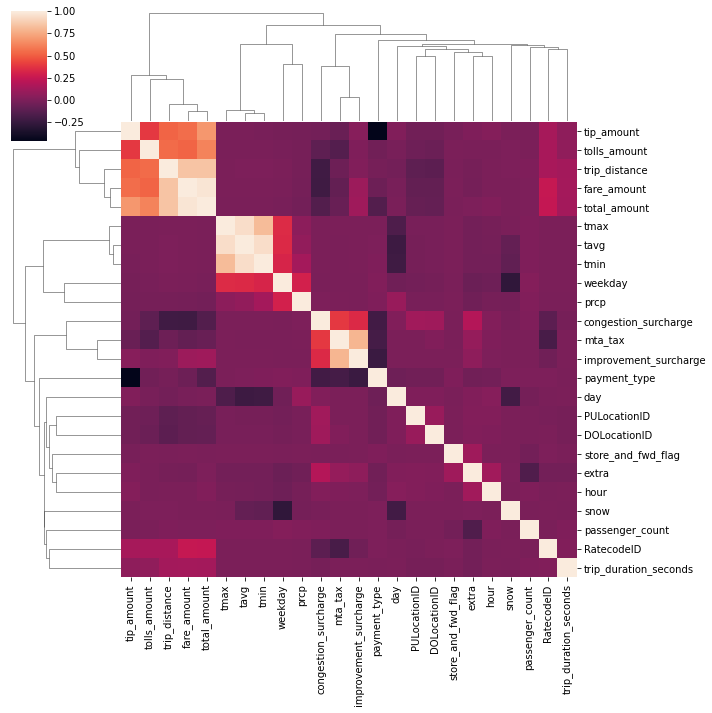

In [107]:
sns.clustermap(data.corr())

In [103]:
data.to_csv('cleaned_taxi_data.csv', index=False)